In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# reading the file 

df = pd.read_csv('spam.tsv' , sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [9]:
# counting the number of spam / ham labels 

df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
ham = df[df['label'] == 'ham']
spam =df[df['label'] == 'spam']

In [14]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [17]:
ham = ham.sample(spam.shape[0])

In [18]:
data = ham.append(spam , ignore_index = True)

In [19]:
data.shape

(1494, 4)

In [20]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Data Visualisation for spam / ham 

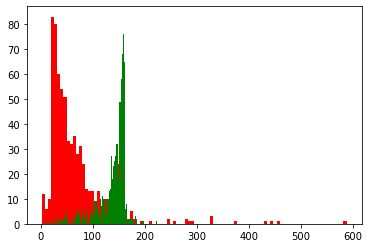

In [25]:
plt.hist(data[data['label']=='ham']['length'] , bins = 100 , color = 'r')
plt.hist(data[data['label']=='spam']['length'] , bins = 100 , color = 'g')

plt.show()

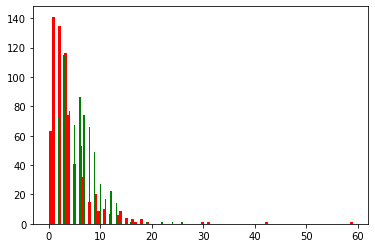

In [27]:
plt.hist(data[data['label']=='ham']['punct'] , bins = 100 , color = 'r')
plt.hist(data[data['label']=='spam']['punct'] , bins = 100 , color = 'g')
plt.show()

# data splitting

In [28]:
data

,label,message,length,punct
0,ham,Lol no ouch but wish i'd stayed out a bit longer,48,1
1,ham,On the way to office da..,25,2
2,ham,I'm e person who's doing e sms survey...,40,5
3,ham,I'm home. Ard wat time will u reach?,36,3
4,ham,K da:)how many page you want?,29,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train , X_test , y_train , y_test = train_test_split(data['message'], data['label'], test_size = 0.3 , random_state = 0, shuffle = True)

In [33]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((1045,), (449,), (1045,), (449,))

# Randm Forest Model building

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
classifier = Pipeline([('tfidf', TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators = 100))])

In [38]:
classifier.fit(X_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# predicting the results

In [41]:
y_pred = classifier.predict(X_test)
y_pred 

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'h

# confusion matrix / accuracy score checking

In [43]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix 

In [44]:
accuracy_score(y_test , y_pred)

0.9510022271714922

In [46]:
# 449 * 0.9510022271714922
# out of 427/449 records were correct 

In [47]:
confusion_matrix(y_test , y_pred)

array([[227,   0],
       [ 22, 200]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



# SVM model building

In [50]:
from sklearn.svm import SVC

In [54]:
svm = Pipeline([('tfidf', TfidfVectorizer()),('classifier',SVC(C = 100 , gamma = 'auto'))])

In [56]:
svm.fit(X_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# predicting results

In [57]:
y_pred = svm.predict(X_test)

In [58]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'spam'

In [59]:
accuracy_score(y_test , y_pred)

0.955456570155902

In [60]:
confusion_matrix(y_test , y_pred)

array([[224,   3],
       [ 17, 205]], dtype=int64)

In [62]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# testing the model by providing random text data 

In [63]:
test1 = ['Hi, you won a lottery worth $5 million , call at 89776 to claim it']
test2 = ['hello and welcome to my github page !!']
test3 = ['You have a new notification']
test4 = ['Please confirm your order y clicking on - yes']
test5 = ['Hi you are learning Natural language Processing and building projects']
test6 = ['Daily reminder to keep learning and growing']

# for Random forest model

In [65]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))
print(classifier.predict(test5))
print(classifier.predict(test6))

['spam']
['ham']
['ham']
['ham']
['ham']
['ham']


# for SVM model

In [66]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))
print(svm.predict(test5))
print(svm.predict(test6))

['spam']
['ham']
['spam']
['spam']
['ham']
['ham']
